In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [34]:
sales_train=pd.read_csv('data/sales_train.csv',parse_dates=[0])
# sales_train.set_inde÷x('date', inplace=True)
sales_train.sort_values(by=['date'],inplace=True)
sales_train.head(5)
# sales_train.count()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
109593,2013-01-01,0,46,18616,349.0,1.0
85162,2013-01-01,0,54,11854,199.0,1.0
18128,2013-01-01,0,28,4906,1799.0,1.0
112216,2013-01-01,0,42,2931,99.0,1.0
85141,2013-01-01,0,54,11604,349.0,1.0


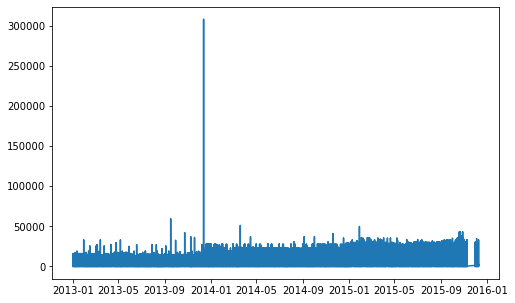

In [39]:
# sales_train.item_price.plot.line()
plt.figure(figsize=(8,5))
plt.plot(sales_train.date,sales_train.item_price)
plt.show()
# pyplot.show()

In [51]:
sales_train.item_id.nunique()

21807

In [50]:
df=sales_train.loc[(sales_train.item_id==4904) & (sales_train.item_cnt_day < 0)]
print(df.count())
df.head()

date              2
date_block_num    2
shop_id           2
item_id           2
item_price        2
item_cnt_day      2
dtype: int64


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1991677,2014-09-09,20,31,4904,399.0,-1.0
2103112,2014-12-10,21,44,4904,399.0,-1.0


In [103]:
df.item_cnt_day.unique()

array([-1.])

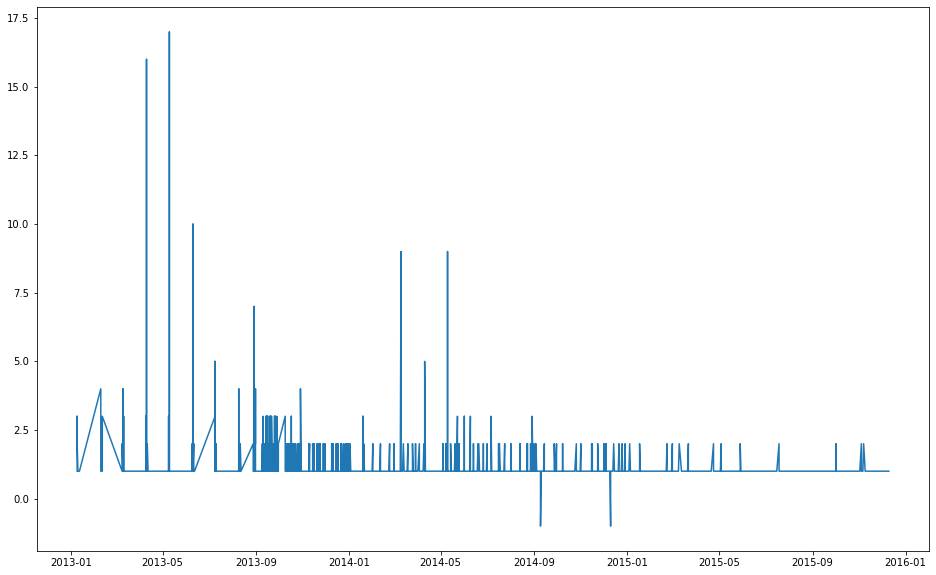

In [47]:
plt.figure(figsize=(16,10))
plt.plot(df.date,df.item_cnt_day)
plt.show()

In [106]:
one_df=sales_train.loc[(sales_train.shop_id==5) & (sales_train.item_id==5037)]#.sort_values(by=sales_train.date)
one_df.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1953995,2014-09-21,20,5,5037,2599.0,1.0
2150561,2014-11-29,22,5,5037,2599.0,1.0
2288631,2014-12-20,23,5,5037,1999.0,1.0
2288630,2014-12-28,23,5,5037,1999.0,1.0
2335446,2015-02-01,24,5,5037,1999.0,1.0
2719247,2015-05-07,30,5,5037,1499.0,1.0
2860998,2015-05-09,32,5,5037,749.5,1.0
2618926,2015-05-29,28,5,5037,1299.0,1.0
2704068,2015-06-28,29,5,5037,1499.0,1.0
2335447,2015-07-01,24,5,5037,1999.0,1.0


In [107]:
one_df=one_df.groupby(one_df.date_block_num,as_index=False).sum()
one_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,20,5,5037,2599.0,1.0
1,22,5,5037,2599.0,1.0
2,23,10,10074,3998.0,2.0
3,24,10,10074,3998.0,2.0
4,28,5,5037,1299.0,1.0


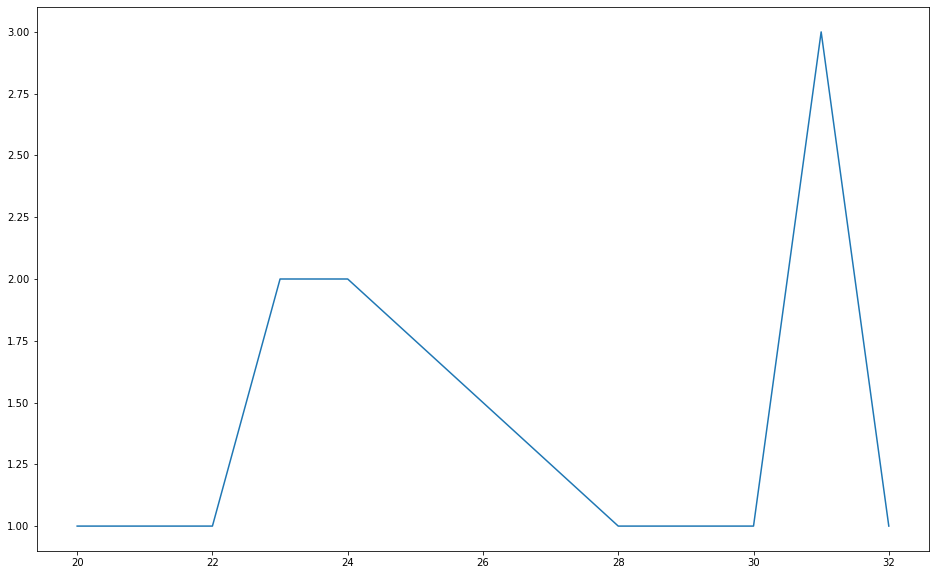

In [108]:
plt.figure(figsize=(16,10))
plt.plot(one_df.date_block_num,one_df.item_cnt_day)
plt.show()

In [109]:
series=one_df[['date_block_num','item_cnt_day']]
series.set_index('date_block_num', inplace=True)
print(series.count())
series.head()


item_cnt_day    9
dtype: int64


,item_cnt_day
date_block_num,
20,1.0
22,1.0
23,2.0
24,2.0
28,1.0


In [111]:
series.item_cnt_day.unique()
np.diff(series.item_cnt_day)

array([ 0.,  1.,  0., -1.,  0.,  0.,  2., -2.])

In [90]:
from statsmodels.tsa.arima.model import ARIMA



                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                    9
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -33022.377
Date:                Sun, 30 Jan 2022   AIC                          66056.755
Time:                        16:37:45   BIC                          66057.231
Sample:                             0   HQIC                         66053.540
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       2.689e-07      0.000      0.002      0.998      -0.000       0.000
ar.L2      -2.241e-07      0.000     -0.001      0.999      -0.000       0.000
ar.L3      -1.345e-07      0.000     -0.001      0.9

/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stati

In [91]:
output=model_fit.forecast()
print((output))
print(len(output))

9    0.999999
dtype: float64
1


/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [99]:
#Modular approach

one_df=sales_train.loc[(sales_train.shop_id==5) & (sales_train.item_id==5037)]#.sort_values(by=sales_train.date)
# one_df.hea÷d(10)
one_df=one_df.groupby(one_df.date_block_num,as_index=False).sum()
# one_df.head()
series=one_df[['date_block_num','item_cnt_day']]
series.set_index('date_block_num', inplace=True)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
output=model_fit.forecast()
print((output))

                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                    9
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -33022.377
Date:                Sun, 30 Jan 2022   AIC                          66056.755
Time:                        16:56:26   BIC                          66057.231
Sample:                             0   HQIC                         66053.540
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       2.689e-07      0.000      0.002      0.998      -0.000       0.000
ar.L2      -2.241e-07      0.000     -0.001      0.999      -0.000       0.000
ar.L3      -1.345e-07      0.000     -0.001      0.9

/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stati

In [100]:
test_df=pd.read_csv('data/test.csv')
for i,row in test_df.iterrows():
    print(row)
    one_df=sales_train.loc[(sales_train.shop_id==row['shop_id']) & (sales_train.item_id==row['item_id'])]#.sort_values(by=sales_train.date)
    # one_df.hea÷d(10)
    one_df=one_df.groupby(one_df.date_block_num,as_index=False).sum()
    # one_df.head()
    series=one_df[['date_block_num','item_cnt_day']]
    series.set_index('date_block_num', inplace=True)
    model = ARIMA(series, order=(4,1,0))
    model_fit = model.fit()
    # summary of fit model
    print(model_fit.summary())
    output=model_fit.forecast()
    print((output))

ID            0
shop_id       5
item_id    5037
Name: 0, dtype: int64
                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                    9
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -33022.380
Date:                Sun, 30 Jan 2022   AIC                          66054.759
Time:                        16:57:49   BIC                          66055.157
Sample:                             0   HQIC                         66052.080
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       2.689e-07      0.000      0.002      0.998      -0.000       0.000
ar.L2      -2.241e-07      0.000     -0.001      0.999      -

/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stati

LinAlgError: Schur decomposition solver error.

In [112]:
from sklearn.ensemble import RandomForestClassifier

# Create a copy to work with
X = train.copy()

# Save and drop labels
y = train.y
X = X.drop('y', axis=1)

# fill NANs 
X = X.fillna(-999)

# Label encoder
for c in train.columns[train.dtypes == 'object']:
    X[c] = X[c].factorize()[0]
    
rf = RandomForestClassifier()
rf.fit(X,y)

SyntaxError: unexpected EOF while parsing (3205859380.py, line 18)

In [114]:
income=pd.read_csv('../income_evaluation.csv')
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [115]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [123]:
#find categorical data
categories=[x for x in income.columns if income[x].dtype=='O']
print(categories)

[' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', ' income']


In [126]:
income[' workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [128]:
for x in categories:
    print("For category ",x," values are: ",income[x].unique(),"\n")


For category   workclass  values are:  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

For category   education  values are:  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

For category   marital-status  values are:  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

For category   occupation  values are:  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

For category   relationship  values are:  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

For categ

In [131]:
income[' income'].value_counts()/len(income) #attribute distribution

 <=50K    0.75919
 >50K     0.24081
Name:  income, dtype: float64

In [139]:
income[' occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [162]:
income[' occupation'].replace(' ?',np.NaN, inplace=True)
income[' native-country'].replace(' ?',np.NaN, inplace=True)


income[' occupation'].isnull().sum()

1843

In [140]:
income[' workclass'].replace(' ?', np.NaN, inplace=True)
income[' workclass'].isnull().sum()

1836

In [142]:
income[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

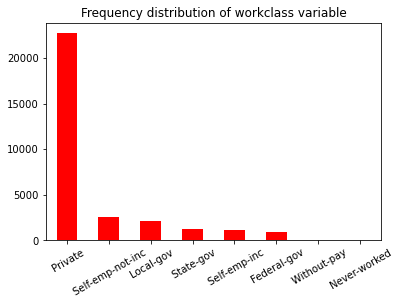

In [143]:
ax = income[' workclass'].value_counts().plot(kind="bar", color="red")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(income[' workclass'].value_counts().index, rotation=30)
plt.show()

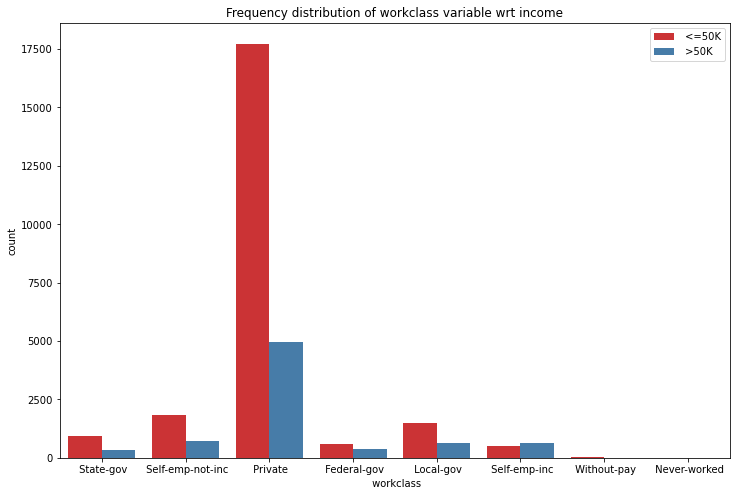

In [146]:
import seaborn as sns
plt.subplots(figsize=(12, 8))
ax = sns.countplot(x=" workclass", hue=" income", data=income, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

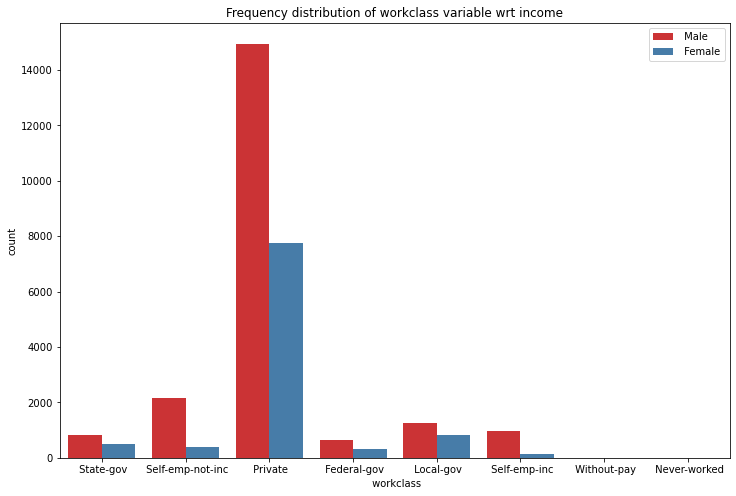

In [147]:
import seaborn as sns
plt.subplots(figsize=(12, 8))
ax = sns.countplot(x=" workclass", hue=" sex", data=income, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

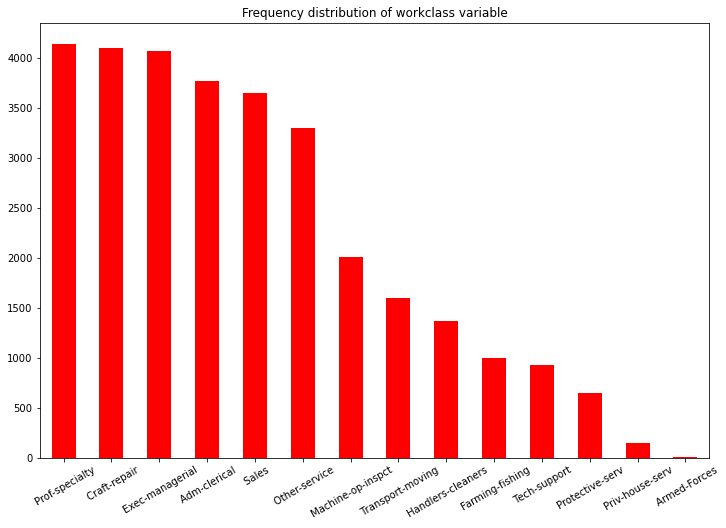

In [149]:
plt.subplots(figsize=(12, 8))
ax = income[' occupation'].value_counts().plot(kind="bar", color="red")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(income[' occupation'].value_counts().index, rotation=30)
plt.show()

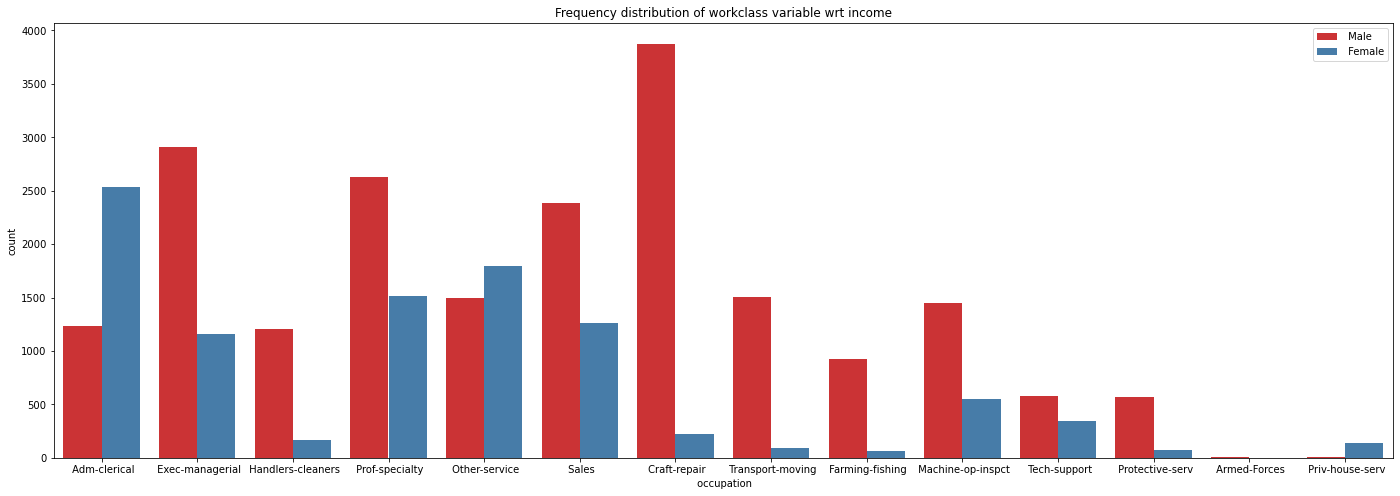

In [152]:
import seaborn as sns
plt.subplots(figsize=(24, 8))
ax = sns.countplot(x=" occupation", hue=" sex", data=income, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

In [170]:
X = income.drop([' income'], axis=1)

y = income[' income']

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [159]:
X_train[' occupation'].mode()[0]

' Craft-repair'

In [163]:
income.isnull().mean()

age                0.000000
 workclass         0.056386
 fnlwgt            0.000000
 education         0.000000
 education-num     0.000000
 marital-status    0.000000
 occupation        0.056601
 relationship      0.000000
 race              0.000000
 sex               0.000000
 capital-gain      0.000000
 capital-loss      0.000000
 hours-per-week    0.000000
 native-country    0.017905
 income            0.000000
dtype: float64

In [166]:
null_columns=[x for x in income.columns if income[x].isnull().mean() >0]
null_columns

[' workclass', ' occupation', ' native-country']

In [167]:
for x in null_columns:
    income[x].fillna(income[x].mode()[0], inplace=True)

In [169]:
print(categories)

[' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', ' income']


In [176]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=categories)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

ModuleNotFoundError: No module named 'category_encoders'

In [36]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8526


In [42]:
print(len(rfc.feature_importances_))

105
